# 探索的データ解析

参考記事 (https://codezine.jp/article/detail/11043)

この繰り返しはREPL（Read-Eval-Print Loop）と呼ばれます。  
この作業の流れはデータ加工やモデル（統計や機械学習の数理モデル）  
を少しずつ組み立てていく際に役立ちます。  
  
より一般的なコーディング作業の流れ（編集、コンパイル、実行、デバッグの繰り返し）では、  
プログラムを完成させてから分析を行うことになります。  
コードを書いて分析までのサイクルが大きくなり、作業量と時間は大きくなりがちです。  
  
対話型環境では小さな実験的なコードから順に組み立てを行い、パラメータを少しずつ調整する作業になります。この作業の流れは、モデルを試行錯誤しながら作成するのに適しています。

In [5]:
#ライブラリをインポートする
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [6]:
#データをロードする
df_raw = pd.read_csv('https://github.com/JeffSackmann/tennis_atp/blob/master/'
                    'atp_matches_2017.csv?raw=true')

In [7]:
#ロードしたcsvデータを表示してみる
df_raw

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2017-M020,Brisbane,Hard,32,A,20170102,300,105777,7.0,NaN,...,7.0,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0
1,2017-M020,Brisbane,Hard,32,A,20170102,299,105777,7.0,NaN,...,0.0,4.0,3.0,61.0,28.0,24.0,16.0,10.0,2.0,4.0
2,2017-M020,Brisbane,Hard,32,A,20170102,298,105453,3.0,NaN,...,5.0,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0
3,2017-M020,Brisbane,Hard,32,A,20170102,297,105683,1.0,NaN,...,7.0,4.0,0.0,84.0,61.0,39.0,14.0,14.0,2.0,4.0
4,2017-M020,Brisbane,Hard,32,A,20170102,296,105777,7.0,NaN,...,14.0,6.0,5.0,82.0,37.0,29.0,24.0,14.0,4.0,7.0
5,2017-M020,Brisbane,Hard,32,A,20170102,295,105453,3.0,NaN,...,0.0,1.0,2.0,47.0,28.0,15.0,5.0,7.0,3.0,8.0
6,2017-M020,Brisbane,Hard,32,A,20170102,294,104527,2.0,NaN,...,13.0,2.0,2.0,97.0,65.0,52.0,11.0,16.0,6.0,10.0
7,2017-M020,Brisbane,Hard,32,A,20170102,293,105683,1.0,NaN,...,3.0,0.0,1.0,44.0,29.0,17.0,6.0,8.0,2.0,6.0
8,2017-M020,Brisbane,Hard,32,A,20170102,292,104745,5.0,NaN,...,2.0,2.0,2.0,38.0,25.0,13.0,3.0,7.0,3.0,8.0
9,2017-M020,Brisbane,Hard,32,A,20170102,291,106233,4.0,NaN,...,4.0,11.0,1.0,58.0,35.0,34.0,9.0,10.0,3.0,4.0


C:\Users\hirotaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hirotaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\hirotaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

Text(0,0.5,'2ndwon  per minutes')

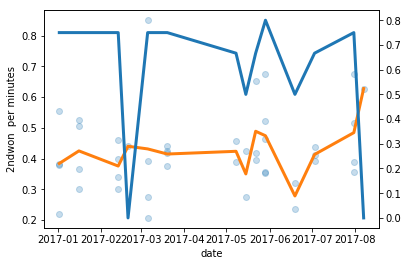

In [15]:
#データを加工する
player = 'Kei Nishikori'
df = df_raw[(df_raw['winner_name'] == player) | ( df_raw['loser_name'] == player)]

#edit 20181008
#df['win'] = df['winner_name'] == player
df['win'] = df.loc[:,('winner_name')] == player

df['2ndwon'] = df['win']*(df['w_2ndWon'])/(df['w_1stWon']) + ~df['win']*(df['l_2ndWon'])/(df['w_1stWon'])
date = pd.to_datetime(df['tourney_date'], format = '%Y%m%d')
df['date'] = date
gb = df.groupby('tourney_date')

#データを可視化する
fig, ax = plt.subplots(1, 1)
ax.plot_date(date.astype(datetime), df['2ndwon'],
             alpha=.25, lw=0)
ax.plot_date(gb['date'].max().astype(datetime),
             gb['2ndwon'].mean(), '-', lw=3)
ax2 = ax.twinx()  
ax2.plot_date(gb['date'].max().astype(datetime),
             gb['win'].mean(), '-', lw=3)
ax.set_xlabel('date')
ax.set_ylabel('2ndwon  per minutes')